### Train the dataset with SVM Model

In [1]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

In [3]:
# import csv into a dataframe
data_read = pd.read_csv("../Resources/fraudTrain.csv")
print(len(data_read))

data_read = pd.read_csv("../Resources/fraudTrain.csv", nrows=300000)
data_read.head()

1296675


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Convert the date of birth into numeric as age
data_train = data_read
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

0         32.0
1         42.0
2         58.0
3         53.0
4         34.0
          ... 
299995    74.0
299996    19.0
299997    31.0
299998    33.0
299999    55.0
Name: age, Length: 300000, dtype: float64

In [5]:
# Display the dataframe column names
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [6]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",32.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,58.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,53.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### One Hot Encoding

In [7]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [8]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [9]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [10]:
# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

# sets y to is_fraud
target = data_read["is_fraud"]

## Split and Scale the data

In [11]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [12]:
X_train.to_csv("correlation.csv")

In [13]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### SVM Model

In [14]:
# Support vector machine linear classifier
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [15]:
# Model Accuracy
print('Test Acc: %.3f' % svm_model.score(X_test_scaled, y_test))

Test Acc: 0.993


In [16]:
svm_prediction = svm_model.predict(X_test_scaled)
print(svm_prediction)
print(f"First 10 Predictions:   {svm_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

[0 0 0 ... 0 0 0]
First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Confusion Matrix

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [18]:
# Confusion Matrix for SVM Model
metrics.confusion_matrix(svm_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, svm_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  74444
False Positives:  0
False Negatives:  556
True Positives:  0


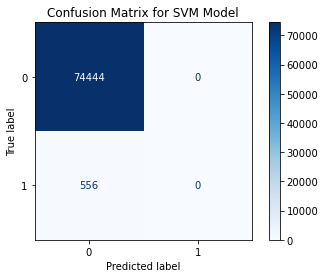

In [20]:
## Plot the confusion matrix chart
class_names = ["0","1"]
plot_confusion_matrix(svm_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Model")
plt.show()

## Classification Report

In [21]:
from sklearn.metrics import classification_report

In [22]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, svm_prediction,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.99      1.00      1.00     74444
       Fraud       0.00      0.00      0.00       556

    accuracy                           0.99     75000
   macro avg       0.50      0.50      0.50     75000
weighted avg       0.99      0.99      0.99     75000



C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
